# Introduction to Bayesian Data Analysis 


<img src="results\figures\presentation\1.png" width="500" height="500" align="center"/>


### Valerio Bonometti                                                                                    
**PhD Candidate University of York**

## Agenda

* Introduction
 
* Bayesian Gears

    * From counts to probability
    * Bayesian updating
    * Likelyhood, Parameters, Prior and Posterior 

* Bayesian Machinery

    * Parameters Estimation
    * Grid Search, Quadratic Approximation, MCMC

* Bayesian Models

    * Binomial Model
    * Logistic Regression
    * Graphical Models

So let's get started that we have loads to cover in 60 minutes

I will do a br

## Introduction

### Introduction - Books

* [Statistical Rethinking 1st Edition (Chapters: 2, 3 and 4)](https://xcelab.net/rm/statistical-rethinking/)
* [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/)
* Edwin Thompson Jayne

### Introduction -  Online Material

* [Statistical Rethinking using PyMC3](https://github.com/pymc-devs/resources/tree/master/Rethinking_2)
* PyMC3 [tutorials](https://docs.pymc.io/nb_tutorials/index.html) and [learning materials](https://docs.pymc.io/learn.html)

### Introduction -  Libraries

* Core (Sections 1, 2 & Binomial Model)
    * Numpy
    * Scipy
    * Pandas
    * Matplolib 

* Estended (Logistic Regression and Graphical Models)
     * PyMC3
     * Theano (can be painful on Windows)
     * Seaborn

### Introduction - Rules


<img src="results\figures\presentation\2.png" width="300" height="300" align="center"/>


* No workshop on theoretical or applied statistics
* Very high level kickststarter to new framework
* Strong focus on visualization
* Play around! (we know it won't happen)
* Won't go into code (I am happy to answer any question)
* Little or no point estimates (no p-values or effect sizes)
* No explicit comparison with frequentist approach
* [No Baye's rule neon sign](https://en.wikipedia.org/wiki/Bayes%27_theorem#/media/File:Bayes'_Theorem_MMB_01.jpg)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.stats import binom, beta

import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Bayesian Gears
 
 
 <img src="results\figures\presentation\3.png" width="400" height="400" align="center"/>

#### *"It is the year 2040, a misterious and dangerous disease is spreading around the world. Border control is now the norm as people are not allowed to freely move around countries anymore "*

### Bayesian Gears - From Counts to Probability

<br/>
<br/>
<br/>

<img src="results\figures\presentation\4.jpg" width="500" height="500" align="center"/>

<br/>

| People Cueing | Number of Tests | Tests Outcomes |
| --- | --- | --- |
| 4 | 3 | Sick, Healthy, Sick |


<br/>
<br/>
<br/>

### Bayesian Gears - From Counts to Probability

<br/>

#### <center> How many sick people are cueing? <center>

<br/>

| HYPOTHESIS | WAYS TO S, H, S |
| --- | --- |
| H, H, H, H | 0 |
| S, H, H, H | 3 |
| S, S, H, H | 8 |
| **S, S, S, H** | **9**|
| S, S, S, S | 0 |

### Bayesian Gears - Bayesan Updating

<br/>

<img src="results\figures\presentation\5.png" width="300" height="300" align="center"/>

<br/>

#### <center> A person try to pass border and results sick <center>

<br/>

| HYPOTHESIS | WAYS TO S| PREVIOUS |  WAYS TO S, H, S, S |
| --- | --- | --- | --- |
| H, H, H, H | 0 | 0 | 0 |
| S, H, H, H | 3 | 1 | 3 |
| S, S, H, H | 8 | 2 | 16 |
| **S, S, S, H** | **9**| **3** | **27** |
| S, S, S, S | 0 | 4 | 0 |

### Bayesian Gears - Likelyhood and Parameters

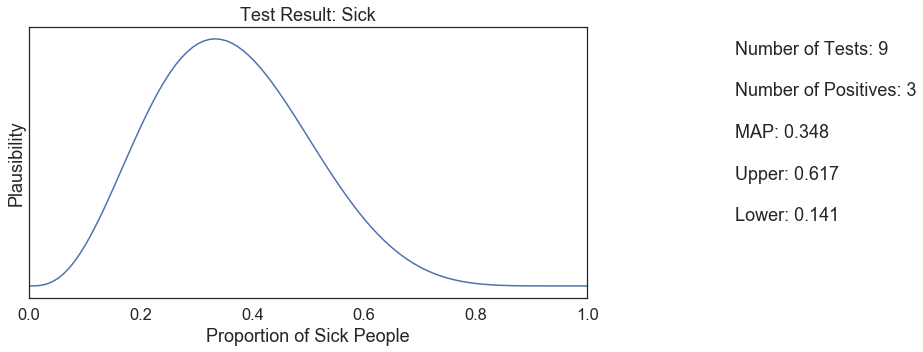

In [2]:
from modules.visuals import visualize_binomial_update

visualize_binomial_update(
    n_tests=10, 
    parameter_space=np.linspace(0, 1, 100),
    figsize=(10, 5),
    auto=True

)

### Bayesian Gears - Prior and Posterior

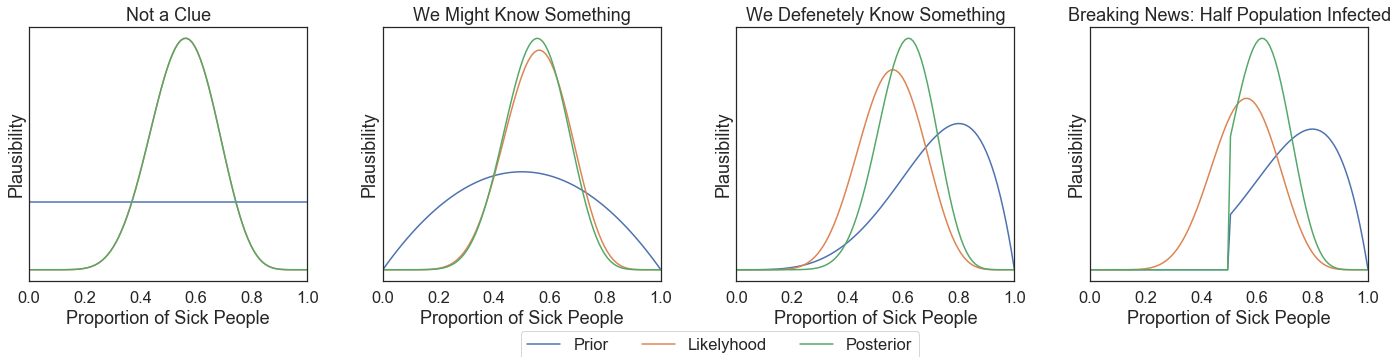

In [3]:
from modules.visuals import visualize_priors_effect

TESTED = 16
POSTIVES = 9

PARAMETER_SPACE = np.linspace(0, 1, 100)
PRIORS = {
    'Not a Clue': np.array([1] * len(PARAMETER_SPACE)),
    'We Might Know Something': beta(2, 2).pdf(PARAMETER_SPACE),
    'We Defenetely Know Something': beta(5, 2).pdf(PARAMETER_SPACE),
    'Breaking News: Half Population Infected': beta(5, 2).pdf(PARAMETER_SPACE),
}
PRIORS['Breaking News: Half Population Infected'][: 50] = 0

visualize_priors_effect(
    parameter_space=PARAMETER_SPACE,
    priors=PRIORS,
    likelyhood=binom.pmf(POSTIVES, TESTED, p=PARAMETER_SPACE),
    figsize=(20, 5)
)

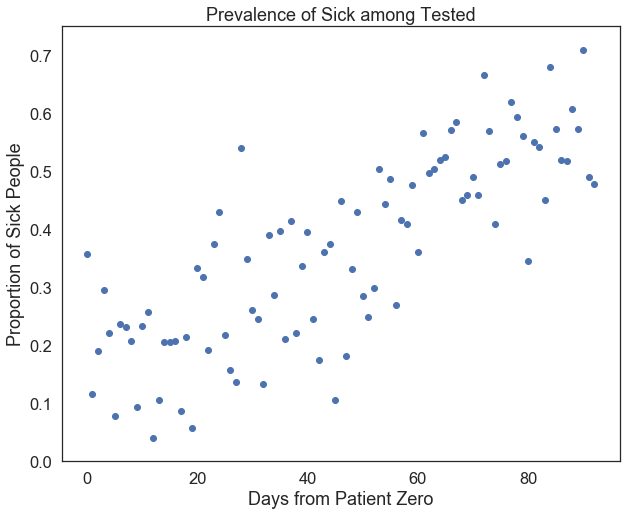

In [4]:
from modules.utils.data_utils import generate_proportion_data
from modules.visuals import visualize_bivariate_regression

X, y = generate_proportion_data(
    max_rate=0.6,
    length=93,
    noise=0.1
)


visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Days from Patient Zero',
    y_label='Proportion of Sick People',
    title='Prevalence of Sick among Tested',
)

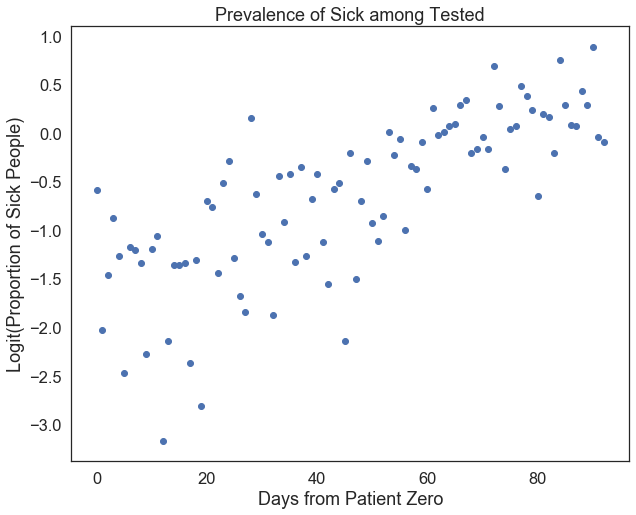

In [25]:
from scipy.special import logit, expit
from modules.stats.models import BivariateLogitNormalRegression

y_logit = logit(y)

visualize_bivariate_regression(
    X=X,
    y=y_logit,
    X_label='Days from Patient Zero',
    y_label='Logit(Proportion of Sick People)',
    title='Prevalence of Sick among Tested',
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [std_normal, Slope]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 34 seconds.


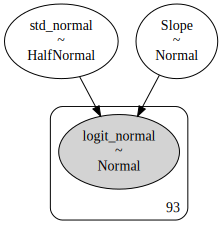

In [26]:
model = BivariateLogitNormalRegression(
    slope_prior=(0, 2),
)

traces = model.fit(X, y_logit, MAP=False, draws=1000, tune=1000)
model.show_plate()

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E741045B00>,
      dtype=object)

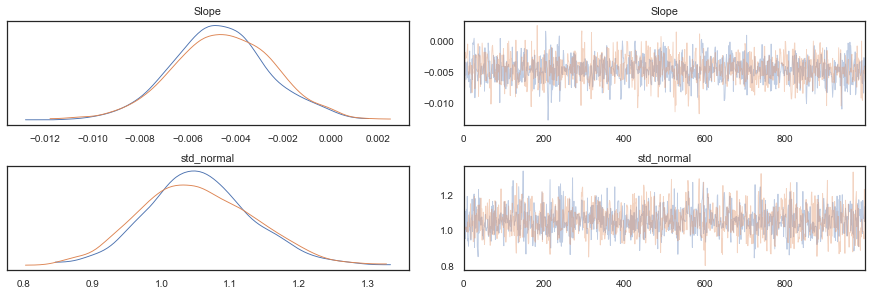

In [27]:
pm.plot_trace(traces)

In [32]:
summary = expit(pm.summary(traces))
summary

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Slope,0.498750,0.50050,0.498000,0.500000,0.5000,0.50000,1.0,1.0,1.0,1.0,0.731059
std_normal,0.741542,0.51974,0.711566,0.767991,0.5005,0.50025,1.0,1.0,1.0,1.0,0.731059
